In [1]:
import GPy, numpy as np
%matplotlib inline
from matplotlib import pyplot as plt
np.random.seed(1234)

In [2]:
X = np.random.uniform(-2, 2, 500)[:,None]
X.sort(0)

In [3]:
k = GPy.kern.Matern32(1)
K = k.K(X)

In [4]:
Y = np.random.multivariate_normal(np.zeros(X.shape[0]), K, size=1).T

In [5]:
Y.shape

(500, 1)

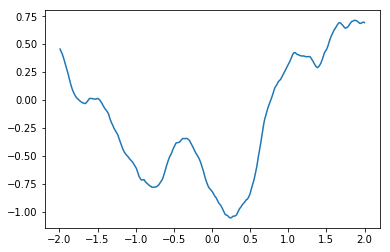

In [6]:
plt.plot(X,Y)

In [7]:
from animate_gp import animate_kernel, plot_data, create_empty_ax, fill_grad

In [8]:
fig, ax = create_empty_ax()
fill_grad(ax, X, np.zeros(X.shape[0]), K)
jsanim = animate_kernel(fig, ax, X, np.zeros(X.shape[0])[:,None], K, 'matern_gp_animiation.mp4', frames=100)
plt.close(fig)
jsanim

In [9]:
np.random.seed(1234)
choice = np.random.choice(X.shape[0], 3, replace=False)
choice.sort(0)

_X = X[choice]
_Y = Y[choice]

m = GPy.models.GPRegression(_X, _Y, kernel=GPy.kern.Matern32(1))
m.optimize()

In [10]:
_mu, _K = m.predict_noiseless(X, full_cov=True)

In [ ]:
fig, ax = create_empty_ax()
fill_grad(ax, X, _mu, _K)
plot_data(ax, _X, _Y)
jsanim = animate_kernel(fig, ax, X, _mu, _K, 'matern_gp_animiation_obs.mp4', frames=100)
plt.close(fig)
jsanim

In [ ]:
dom = np.linspace(X.min(), X.max(), 10)
k_step = GPy.kern.DomainKernel(1, dom[:-1], dom[1:], ARD=True, name='steps')

In [ ]:
K = k_step.K(X)
fig, ax = create_empty_ax()
fill_grad(ax, X, np.zeros(X.shape[0]), K)
jsanim = animate_kernel(fig, ax, X, np.zeros(X.shape[0])[:,None], K, 'step_GP_animiation.mp4', frames=100)
plt.close(fig)
jsanim

In [ ]:
np.random.seed(1234)
choice = np.random.choice(X.shape[0], 30, replace=False)
choice.sort(0)

_X = X[choice]
_Y = Y[choice]

m = GPy.models.GPRegression(_X, _Y, kernel=k_step.copy())
m.optimize()

In [ ]:
_mu, _K = m.predict_noiseless(X, full_cov=True)

fig, ax = create_empty_ax()
fill_grad(ax, X, _mu, _K)
plot_data(ax, _X, _Y)
jsanim = animate_kernel(fig, ax, X, _mu, _K, 'step_gp_animiation_obs.mp4', frames=100)
plt.close(fig)
jsanim

In [ ]:
import GPy, numpy as np, pandas as pd
from GPy.kern import LinearSlopeBasisFuncKernel, DomainKernel, ChangePointBasisFuncKernel
%matplotlib inline
from matplotlib import pyplot as plt

In [ ]:
np.random.seed(1234)

dom = np.linspace(X.min(), X.max(), 4)
k_step = GPy.kern.DomainKernel(1, dom[:-1], dom[1:], ARD=True, name='steps')

Phi = k_step.phi(X)
_ = plt.plot(X, Phi)

In [ ]:
k = GPy.kern.Matern32(1, 1.)
Kf = k.K(X)

#k_per = GPy.kern.PeriodicMatern32(1, variance=100, period=1)
#k_per.period.fix()

#k_dom = DomainKernel(1, 1., 5.)
#k_perdom = k_per * k_dom
#Kpd = k_per.K(X)

In [ ]:
np.random.seed(1234)
#alpha = np.random.gamma(3, 1, Phi.shape[1])
w = np.random.normal(0, 1, size=Phi.shape[1])[:,None]

f_SE = np.random.multivariate_normal(np.zeros(X.shape[0]), Kf)[:, None]
#f_perdom = np.random.multivariate_normal(np.zeros(X.shape[0]), Kpd)[:, None]
f_w = Phi.dot(w)

f = f_SE + f_w #+ f_perdom

y = f + np.random.normal(0, .3, f.shape)

In [ ]:
plt.plot(X, f_w, color='#9e1732')
plt.plot(X, f, color='#9e1732')
_ = plt.scatter(X, y)
# Make sure the function is driven by the linear trend, as there can be a difficulty in identifiability.

In [ ]:
K = GPy.util.linalg.tdot(Phi.dot(w))
fig, ax = create_empty_ax()
fill_grad(ax, X, np.zeros(X.shape[0]), K)
jsanim = animate_kernel(fig, ax, X, np.zeros(X.shape[0])[:,None], K, 'posteriors_steps_gp_animiation.mp4', frames=100)
plt.close(fig)
jsanim

In [ ]:
np.random.seed(1234)
choice = np.random.choice(X.shape[0], 20, replace=False)
choice.sort(0)

_X = X[choice]
_Y = y[choice]

k = (GPy.kern.Bias(1) 
     + GPy.kern.Matern32(1) 
     + k_step.copy()
     #+ k_per.copy()
    )
#k.randomize()
m = GPy.models.GPRegression(_X, _Y, k)

In [ ]:
m.optimize()

In [ ]:
m.plot()

In [ ]:
_mu, _K = m.predict_noiseless(X, full_cov=True)

fig, ax = create_empty_ax()
fill_grad(ax, X, _mu, _K)
plot_data(ax, _X, _Y)
ax.plot(X, f, color='#9e1732', lw=2)
jsanim = animate_kernel(fig, ax, X, _mu, _K, 'additive_gp_animiation_obs.mp4', frames=100)
plt.close(fig)
jsanim

In [ ]:
_mu, _K = m.predict_noiseless(X, full_cov=True, kern=m.kern.Mat32.copy())

fig, ax = create_empty_ax()
fill_grad(ax, X, _mu, _K)
#plot_data(ax, _X, _Y)
ax.plot(X, f_SE, color='#9e1732', lw=2)
jsanim = animate_kernel(fig, ax, X, _mu, _K, 'additive_gp_matern_animiation_obs.mp4', frames=100)
plt.close(fig)
jsanim

In [ ]:
_mu, _K = m.predict_noiseless(X, full_cov=True, kern=m.kern.steps.copy())

fig, ax = create_empty_ax()
fill_grad(ax, X, _mu, _K)
#plot_data(ax, _X, _Y)
ax.plot(X, f_w, color='#9e1732', lw=2)
jsanim = animate_kernel(fig, ax, X, _mu, _K, 'additive_gp_steps_animiation_obs.mp4', frames=100)
plt.close(fig)
jsanim

In [ ]:
w_pred, w_var = m.kern.steps.posterior_inf()
df = pd.DataFrame(w, columns=['truth'], index=np.arange(Phi.shape[1]))
df['mean'] = w_pred
df['std'] = np.sqrt(w_var.diagonal())
np.round(df, 2)

In [ ]:
df.round(3).to_clipboard()